# **Manifold** 
---
## **Summary**
to be added ..
    
## **References**
1. Goodfellow, I, Bengio, Y., Courville, Aaron. 2016. Deep learning. The MIT Press.
2. Albon, C. 2018. Python Machine Learning Cookbook

## **Concept**
* <font size =4, color=blue>**To overcome the deficiency of the performance on nonlienar relationships within data**</font>
* <font size =4, color=red>Seek to learn the fundamental two-dimensional nature of the data</font>
* <font size =4, color=brown> Multidimensional scaling (**MDS**); Locally Linear Embeding (**LLE**), Isometric Mapping (**Isomap**)
* <font size =4, color=darkgreen>Manifold VS PCA</font>
    * <font size=3, color=brown>Missing data</font>: 
        * <font size=3, color=red>Manifold</font>: No good framework to handling missing data; <font size=3, color=blue>PCA</font>: straightforward iterative approaches
    * <font size=3, color=brown>Data noise</font>: 
        * <font size=3, color=red>Manifold</font>: 'short-circutting' the manifold and drastically changing the embedding; <font size=3, color=blue>PCA</font>: Natural filteration
    * <font size=3, color=brown>Optimal number of neighbors</font>: 
        * <font size=3, color=red>Manifold</font>: No soild quantitative way to choose $\Longrightarrow$ Results depending on the number of neighbors; <font size=3, color=blue>PCA</font>: No need to make choice
    * <font size=3, color=brown>Global optimal number of the output dimensions</font>: 
        * <font size=3, color=red>Manifold</font>: Difficult to determine; <font size=3, color=blue>PCA</font>: Based on explained variance
    * <font size=3, color=brown>The meaning of the embedding dimensions</font>:
        * <font size=3, color=red>Manifold</font>: Not always clear; <font size=3, color=blue>PCA</font>: the principal components have very clear meanings.
    * <font size=3, color=brown>Computational cost</font>:
        * <font size=3, color=red>Manifold</font>: High, scaling as $O[N^2]$ or $O[N^3]$ <font size=3, color=blue>PCA</font>: Faster with randomized approaches.
* <font size =4, color=darkgreen>Suggestions: Run the PCA first, then explore the data with manifold</font>
* <font size =4, color=red><b>Recommendation for the usage of the mainfold variants in Scikit-Learn</b></font>
    * <font size =3, color=blue>For toy example and S-curve example below using sklearn.manifold.LocallyLinearEmbedding</font>
    * <font size =3, color=blue>Isomap generally lead to more meaningful embeddings tan LLE for high-dimensional data from real-world sources</font>
    * <font size =3, color=blue>For highly clustered data, _t-distributed stochastic neighbor embedding_ (t-SNE: sklearn.manifold.TSNE) works well in slow process </font>
* <font size =4, color=orange><b>Isomap Example</b></font>
* <font size =4, color=orange><b>Digit Visualization</b></font>

<h2><font size = 4.5>Table of Content</font></h2>

<hr>

<div class="alert alert-block alert-info" style="margin-top: 10px">
<div><a href="#ref1">1. Manifold Example</a>
<ul><div><a href="#ref2">1.1 Multidimensional Scaling (MDS)</a></div>
<div><a href="#ref3">1.2 MDS as Manifold Learning</a></div></ul></div>
<div><a href="#ref4">2. Nonlinear Embedding</a></div>
<div><a href="#ref5">3. Solution: Nonlinear Embedding with Locally Linear Embeddings</a></div>
<div><a href="#ref6">4. Isomap Example on Faces</a></div>
<div><a href="#ref7">5. Visualization of Digits</a></div>
 
<hr>

<a id="ref1"></a>
<font size = 4, color = brown>1. Manifold Example</font>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [42]:
def make_hello(N = 1000, rseed = 42):
    # make a plot with 'Hello' text; save as PNG
    fig, ax = plt.subplots(figsize = (4, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
    ax.axis('off')
    ax.text(
        0.5, 
        0.4, 
        'HELLO', 
        va='center', 
        ha='center', 
        weight='bold', 
        size=85
    )
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this png and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

(-0.11881377209280353,
 4.140158966213945,
 0.02958197717253727,
 1.0142039520339077)

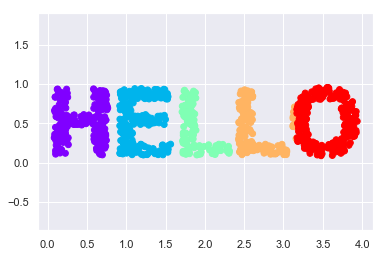

In [43]:
X = make_hello(1000)
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

<a id="ref2"></a>
<font size = 4, color = brown>1.1 Multidimensional Scaling (**MDS**)</font>

Text(0.5, 1.0, 'Rotated Hello')

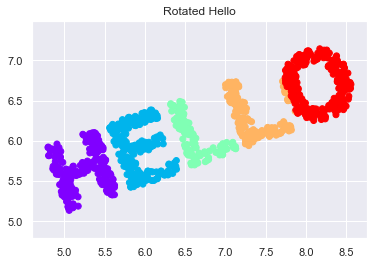

In [44]:
def rotate (X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')
plt.title('Rotated Hello')

#### Pairwise distance between <font color=red>_i</font> and <font color=red>_j</font> points

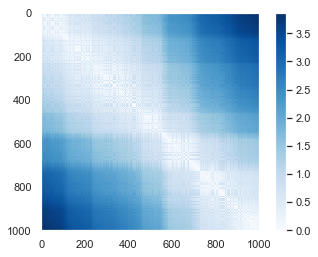

In [45]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D2 = pairwise_distances(X2)
np.allclose(D, D2)

plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

(-1.039006410772759, 1.0377133989963179, -2.064666005451131, 2.135458244484913)

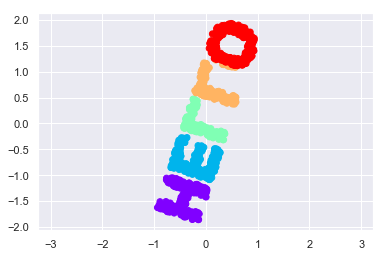

In [46]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

<a id="ref3"></a>
<font size = 4, color = brown>1.2 MDS as Manifold Learning</font>
* <font color=red size=4>a. projecting the data to three dimensions</font>

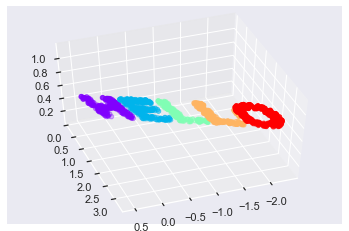

In [47]:
def random_projection(X, dimension = 3, rseed = 42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)

from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim = 70, elev = 50)

* <font color=red size=4>b. Performing MDS on 3D data to compute the distance matrix in order to output the optimal 2D embedding for the distance matrix</font>

(-1.0390064107727603,
 1.03771339899632,
 -2.0646660054511305,
 2.1354582444849126)

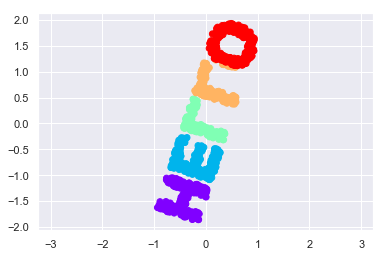

In [48]:
model = MDS(n_components = 2, random_state = 1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

<a id="ref4"></a>
<font size = 4, color = brown>2. Nonlinear Embeddings (Where MDS fails)</font>
* <font size=4 color=blue>For an example, data wrapped up into the shape of an 'S'.

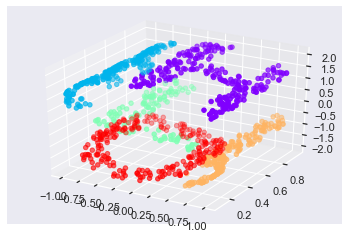

In [49]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

* <font size =4 color=blue>The MDS fails to recover the underlying structure</font>

(-1.3904556323554298,
 1.2493637628504923,
 -2.3855494181659127,
 2.1899859123555574)

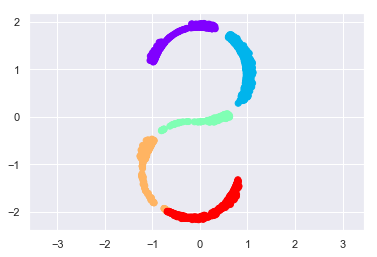

In [50]:
from sklearn.manifold import MDS
model = MDS(n_components = 2, random_state = 2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

<a id="ref5"></a>
<font size=4 color=orange>3. Solution: Nonlinear Manifold: Locally Lineaer Embedding (LLE)</font>
* <font size=4 color=blue>Only preserves the distance among nearby points instead of faraway (all) points</font>

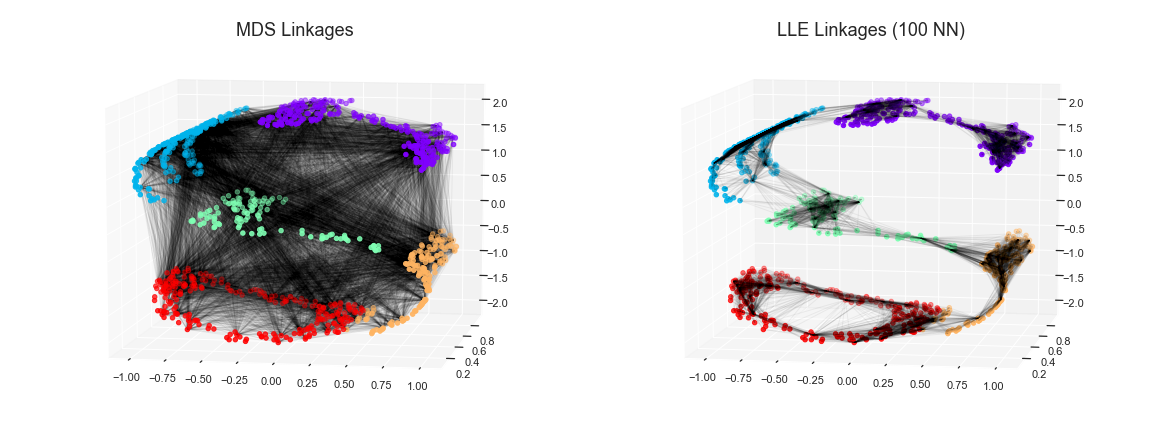

In [51]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.neighbors import NearestNeighbors

# construct lines for MDS
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
lines_MDS = [(XS[i], XS[j]) for i in ind[:100] for j in ind[100:200]]

# constructure lines for LLE
nbrs = NearestNeighbors(
    n_neighbors = 100
).fit(XS).kneighbors(XS[ind[:100]])[1]
lines_LLE = [(XS[ind[i]], XS[j]) for i in range(100) for j in nbrs[i]]
titles = ['MDS Linkages', 'LLE Linkages (100 NN)']

# plot the results
fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(16, 6), 
    subplot_kw=dict(
        projection='3d', 
        facecolor='none'
    )
)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)

for axi, title, lines in zip(ax, titles, [lines_MDS, lines_LLE]):
    axi.scatter3D(XS[:, 0], XS[:, 1], XS[:,2], **colorize)
    axi.add_collection(
        Line3DCollection(lines, lw=1, color='black', alpha=0.05)
    )
    axi.view_init(elev = 10, azim = -80)
    axi.set_title(title, size = 18)
                       
fig.savefig('MDS_vs_LLE.png')

* <font size=4 color=blue>_a_. MDS fails to flatten the data while adequately preserving the length of every line drawn between the two points</font>
* <font size=4 color=red>_b_. LLE preserves only the distances between neighboring points (100 nearest neighbors); keeping the lengths of the lines approxiamtely the same</font>
* <font size=4 color=brown>An example of <b>***modified LLE***</b></font>

(0.15, -0.15)

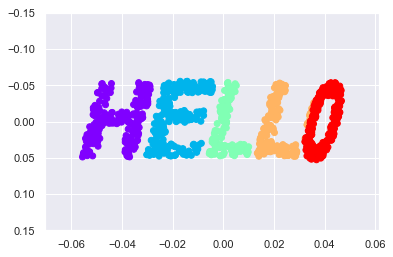

In [56]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(
    n_neighbors=100, 
    n_components=2, 
    method='modified', 
    eigen_solver='dense'
)

out =  model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

<a id="ref6"></a>
<font size=4 color=orange>4. Isomap Example on Faces (incorporating with SVM)</font>

The data dimension: (2370, 2914)


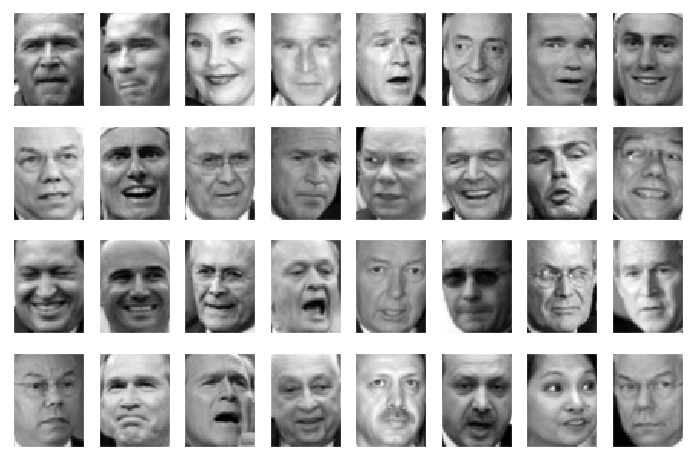

In [10]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 30)
print('The data dimension:', faces.data.shape)

fig, ax = plt.subplots(
    4, 
    8, 
    figsize=(12, 8), 
    subplot_kw=dict(
        xticks=[], yticks=[]
    )
)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

Text(0, 0.5, 'cumulative variance')

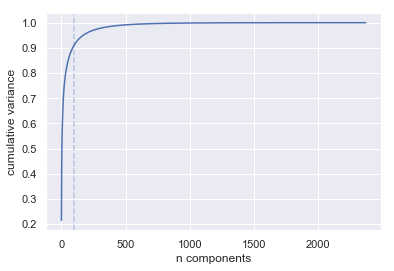

In [16]:
from sklearn.decomposition import PCA
model = PCA(svd_solver = 'randomized').fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.axvline(x = 100, ls = 'dashed', alpha = 0.3)
plt.xlabel('n components')
plt.ylabel('cumulative variance')

* <font size=4 color=brown>PCA Results: 90% Variance explained by around 100 principal components $\Longrightarrow$ very high dimensional $\Longrightarrow$ Highly unlinear</font>
* <font size=4 color=brown>Solution: LLE and Isomap are really helpful</font>

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components = 2)
proj = model.fit_transform(faces.data)

from matplotlib import offsetbox
%matplotlib inline

def plot_components(
    data, 
    model, 
    images=None, 
    ax=None, 
    thumb_frac=0.05, 
    cmap= 'gray'
):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0)))**2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap = cmap), proj[i]
            )
            ax.add_artist(imagebox)

fig, ax = plt.subplots(
    figsize = (12, 12), 
    subplot_kw = dict(facecolor = 'none', xticks = [], yticks = [])
)
plot_components(
    faces.data, 
    model=Isomap(n_components = 2), 
    images=faces.images[:, ::2, ::2]
)
middel_x = (proj[:, 0].max() + proj[:, 0].min())
ax.text(
    middel_x, 
    -7000, 
    '$\longleftarrow$ Darkness Gradient $\longrightarrow$', 
    size=16, 
    va ='center', 
    color='blue'
)
ax.text(
    proj[:, 0].min(), 
    -7000, 
    '$\longleftarrow$ Face Orientation $\longrightarrow$', 
    size=16, 
    va='bottom', 
    color='blue', 
    rotation='90'
)

: 

<a id="ref7"></a>
<font size=4 color=brown>5. Visualization Structure in Digits</font>
* <font size=4 color = black>MINIST handwritten diigts set</font>

In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

fig, ax = plt.subplots(6, 8, subplot_kw = dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap = 'gray_r')

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
data = mnist.data[::30]
target = mnist.target[::30]

model =  Isomap(n_components = 2)
proj = model.fit_transform(data)
plt.scatter(
    proj[:, 0], 
    proj[:, 1], 
    c=target, 
    cmap=plt.cm.get_cmap('jet', 10)
)
plt.colorbar(ticks = range(10))
plt.clim(-0.5, 9.5)